# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import math
# additional imports if necessary


### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [119]:
# your code here
def gaussian():
  dff = pd.concat([X_train,y_train] , axis = 1)
  rt,ct=X_train.shape
  n = dff.r.unique()
  n.sort()
  l = []
  for i in n:
    d = dff[dff['r']==i]
    mean = pd.DataFrame(d.mean(axis=0)[:-1])
    mean.columns=['Mean']
    var = pd.DataFrame(d.var(axis=0)[:-1])
    var.columns=['Variance']
    l.append(pd.concat([mean,var],axis=1))
  for i in l:
    print(i)
  return l , n

### Calculate priors

Write a function to calculate the priors for each class.

In [120]:
# your code here
def priors():
  pr = []
  dff = pd.concat([X_train,y_train] , axis = 1)
  rt,ct=X_train.shape
  n = dff.r.unique()
  n.sort()
  for i in n:
    d = dff[dff['r']==i]
    pr.append(len(d)/rt)
  return pr

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [121]:
# your code here
all_prob_list=[[],[],[],[]]
def likelihood(X_train,y_train):
  idx=0
  count=0
  y_pred=[]
  for i in X_train.index:
    min_curr_prob = 0
    mcp_index = 0
    ji = 0
    for j in l:
      prob = [0*n]
      p=1
      io = 0
      j = j.transpose()
      for k in j:
        # print(X_train[k][i],j.iat[io,0],j.iat[io,1])
        p *= (norm.pdf(X_train[k][i],j.iat[0,io],math.sqrt(j.iat[1,io])))
        io+=1
      p = p*pr[ji]
      all_prob_list[ji].append(p)
      if p>min_curr_prob:
        min_curr_prob = p
        mcp_index = ji
      ji+=1
    # print(y_train.iat[idx,0],mcp_index+1)
    y_pred.append(mcp_index+1)
    if y_train.iat[idx,0]==mcp_index+1:
      count+=1
    idx+=1
  return count,all_prob_list,y_pred
    

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [122]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')

In [123]:
# your code here

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [124]:
# your code here
X = data.iloc[:,:-1]
y = data.iloc[:,[-1]]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=1)

### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [125]:
l , n = gaussian()
pr = priors()
count,all_prob_list,y_pred = likelihood(X_test,y_test)

          Mean   Variance
ws1 -62.614776  11.613114
ws2 -56.250660   9.749173
ws3 -60.517150  13.239784
ws4 -64.139842  12.935419
ws5 -70.385224  21.777136
ws6 -82.825858  14.636261
ws7 -84.018470  15.309182
          Mean   Variance
ws1 -37.159151  73.873540
ws2 -56.106101   9.962117
ws3 -55.649867  16.510060
ws4 -38.403183  61.868926
ws5 -67.177719  25.263545
ws6 -72.856764  22.825174
ws7 -73.748011  22.768779
          Mean   Variance
ws1 -49.743869   6.901431
ws2 -54.839237  13.299221
ws3 -52.787466  10.189679
ws4 -50.694823  12.901148
ws5 -63.294278  11.825732
ws6 -81.264305  12.697711
ws7 -82.419619  17.992838
          Mean   Variance
ws1 -60.294430   9.559357
ws2 -55.323607  10.538617
ws3 -50.641910  17.592175
ws4 -61.034483  13.490829
ws5 -49.389920  12.616175
ws6 -86.938992  11.876587
ws7 -86.732095  12.053036


In [126]:
accuracy = count/len(X_test)
accuracy

0.99

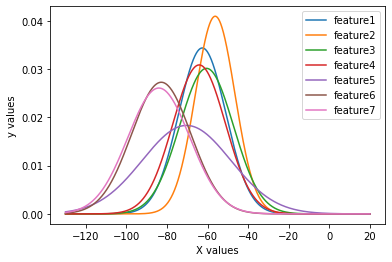

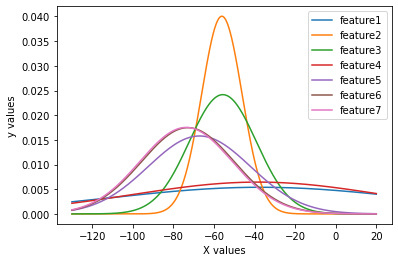

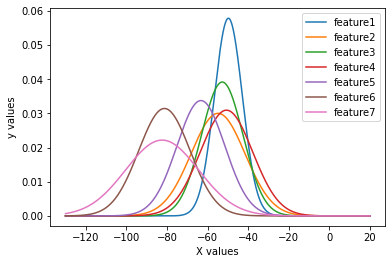

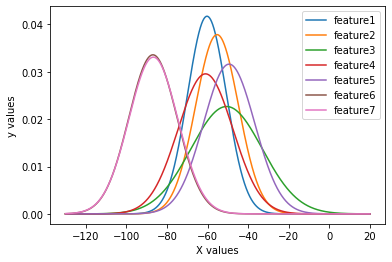

In [127]:
import matplotlib.pyplot as plt
from scipy import stats

for i in range(4):
  for k in range(7):
    l1 = "feature" + str(k+1)
    m = l[i]['Mean'][k]
    v = l[i]['Variance'][k]
    x_values = np.arange(-130,20,0.01)
    y_values = stats.norm.pdf(x_values,m,v)
    plt.plot(x_values, y_values, label=l1)
  plt.xlabel("X values")
  plt.ylabel("y values")
  plt.legend()
  plt.show()

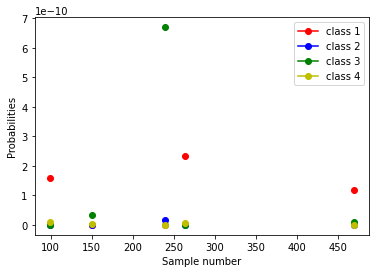

In [128]:
# your code here
mis_ind = []

for i in range(len(y_pred)):
  if(y_pred[i]!=y_test.iat[i,0]):
    mis_ind.append(i)

for i in range(len(mis_ind)):
  plt.plot(mis_ind[i],all_prob_list[0][mis_ind[i]], color='r', marker='o')
  plt.plot(mis_ind[i],all_prob_list[1][mis_ind[i]], color='b', marker='o')
  plt.plot(mis_ind[i],all_prob_list[2][mis_ind[i]], color='g', marker='o')
  plt.plot(mis_ind[i],all_prob_list[3][mis_ind[i]], color='y', marker='o')
  # print(y_test.iat[mis_ind[i],0])
  # print("0 :",all_prob_list[0][mis_ind[i]])
  # print("1 :",all_prob_list[1][mis_ind[i]])
  # print("2 :",all_prob_list[2][mis_ind[i]])
  # print("3 :",all_prob_list[3][mis_ind[i]])

plt.legend(["class 1", "class 2", "class 3", "class 4"])
plt.xlabel("Sample number")
plt.ylabel("Probabilities")
plt.show()

In [129]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(X_train, y_train)
# GaussianNB(priors = None, var_smoothing = 1e-09)
y_pred_sc=GNBclf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
y_pred_sc = y_pred_sc.tolist()

In [131]:
count=0
for i in range(len(y_pred_sc)):
  if y_pred_sc[i] == y_test.iat[i,0]:
    count+=1
count

495

Answer 7. Comparing the results with the scikit-learn implementation accuracy is same in both implementations